Notebook to demonstrate random variate generation using the inverse transform method. ITM generates pseudo random numbers from a distribution given its cdf, and uniform samples. 
Since ITM depends on the cdf, it does not work for all distributions, for which the cdf cannot be computed analytically (for e.g. normal distribution), and in this case, other methods are suitable. 

Inverse Transform Theorem states that if X is a continuous random variable with cdf F(x), then F(X) ~ Unif(0,1).

https://en.wikipedia.org/wiki/Inverse_transform_sampling

ITM has the following procedure:
To generate a random variable X, of some distribution,
1. Generate a Uniform(0, 1) random variable
2. Use the inverse of the CDF of the distribution to get X. i.e. $$F^{-1}(U) = X$$

If you have this inverse pre-calculated (easy for some distributions), you can use numpy to generate the X's. If you are lazy, sympy is a symbolic math library that lets you perform mathematical operations; in particular the stats module can be used to do the math for you. 

[Note, that the functionality may change in future versions of sympy, and this notebook is using sympy=1.6.2]


In [4]:
# requires sympy==1.6.2
!pip install sympy==1.6.2

     |████████████████████████████████| 5.8MB 2.7MB/s 
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1


In [1]:
import sympy
sympy.__version__

'1.6.2'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.stats import cdf, density
from sympy import Symbol, pprint, Eq, solve, solveset
from sympy.utilities.lambdify import lambdify
from sympy import integrate

In [3]:
# set your favorite seed for reproducibility
np.random.seed(42)

In [4]:
# pick your favorite style sheet
# https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html
plt.style.use('Solarize_Light2')

# **Continuous Distributions**

(array([493., 538., 503., 509., 501., 507., 503., 503., 523., 495., 528.,
        505., 493., 512., 471., 451., 515., 487., 487., 476.]),
 array([1.00010471, 1.44997243, 1.89984015, 2.34970786, 2.79957558,
        3.2494433 , 3.69931102, 4.14917873, 4.59904645, 5.04891417,
        5.49878189, 5.9486496 , 6.39851732, 6.84838504, 7.29825276,
        7.74812047, 8.19798819, 8.64785591, 9.09772362, 9.54759134,
        9.99745906]),
 <a list of 20 Patch objects>)

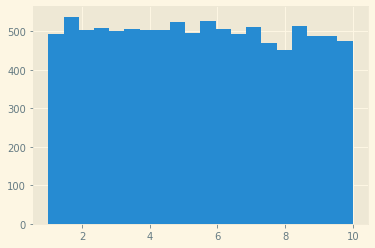

In [5]:
# Uniform Distribution
# USING NUMPY
# It is easy to get an expression for X from the inverse cdf.
# You may recall that the cdf of a uniform is (x-a)/(b-a). 
# Solving for X, we get the expresssion X = a + (b-a) * U

a, b = 1, 10
n = 10000

u = np.random.uniform(0, 1, n)
x = a + (b-a)*u

# Plot results
n_bins = 20
plt.hist(x, bins = n_bins)

cdf
⎧  0     for a > x
⎪                 
⎪-a + x           
⎨──────  for b ≥ x
⎪-a + b           
⎪                 
⎩  1     otherwise


(array([499., 503., 474., 491., 492., 475., 490., 502., 507., 503., 524.,
        485., 493., 490., 499., 540., 466., 545., 495., 527.]),
 array([1.57744578e-03, 5.01460987e-01, 1.00134453e+00, 1.50122807e+00,
        2.00111161e+00, 2.50099515e+00, 3.00087869e+00, 3.50076223e+00,
        4.00064577e+00, 4.50052932e+00, 5.00041286e+00, 5.50029640e+00,
        6.00017994e+00, 6.50006348e+00, 6.99994702e+00, 7.49983056e+00,
        7.99971410e+00, 8.49959764e+00, 8.99948119e+00, 9.49936473e+00,
        9.99924827e+00]),
 <a list of 20 Patch objects>)

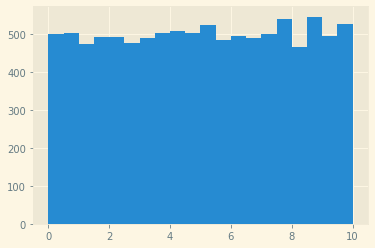

In [6]:
# Uniform Distribution
# USING SYMPY
# Now to do it with sympy, it may seem like more code, but
# in this case, we can use sympy to solve for X, instead of doing it ourselves.
# This is a (trivial) example to generate a Unif(a, b) from Unif(0,1)

from sympy.stats import Uniform

x = Symbol("x")
a = Symbol("a")
b = Symbol("b")

# Define our target (uniform) distribution, and its cdf F_x
D = Uniform("d", a, b)
F_x = cdf(D)(x)

print("cdf")
pprint(F_x)

# Solve for x using sympy
u = Symbol("u")
expr = solve(Eq(F_x, u), x)[0]

# Generate x from Unif(aa, bb) using Unif(0, 1)
# You can generate x for any Unif(aa, bb)
aa, bb = 0, 10
n = 10000
unifs = np.random.uniform(0, 1, n)

f=lambdify([u, a, b], expr, "numpy")
x_vals = f(unifs, aa, bb)

# Plot results
n_bins = 20
plt.hist(x_vals, bins = n_bins)

(array([3.678e+03, 2.322e+03, 1.540e+03, 9.280e+02, 5.490e+02, 3.580e+02,
        2.200e+02, 1.540e+02, 9.600e+01, 5.600e+01, 3.800e+01, 1.300e+01,
        2.300e+01, 1.100e+01, 4.000e+00, 2.000e+00, 4.000e+00, 3.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.44375157e-04, 1.38316093e+00, 2.76617749e+00, 4.14919405e+00,
        5.53221060e+00, 6.91522716e+00, 8.29824372e+00, 9.68126027e+00,
        1.10642768e+01, 1.24472934e+01, 1.38303099e+01, 1.52133265e+01,
        1.65963431e+01, 1.79793596e+01, 1.93623762e+01, 2.07453927e+01,
        2.21284093e+01, 2.35114258e+01, 2.48944424e+01, 2.62774590e+01,
        2.76604755e+01]),
 <a list of 20 Patch objects>)

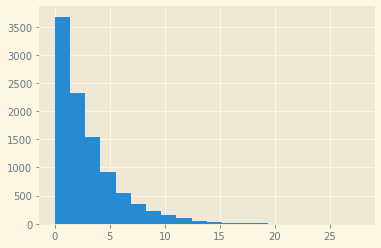

In [7]:
# Exponential Distribution
# USING NUMPY

lam = 1/3
n = 10000

u = np.random.uniform(0, 1, n)
x = (-1/lam)*np.log(1-u)

# Plot results
n_bins = 20
plt.hist(x, bins = n_bins)

(array([ 226.,  586.,  955., 1145., 1244., 1190., 1126.,  974.,  763.,
         587.,  444.,  291.,  203.,  106.,   78.,   46.,   17.,   12.,
           5.,    2.]),
 array([7.05905232e-03, 4.43136922e-01, 8.79214792e-01, 1.31529266e+00,
        1.75137053e+00, 2.18744840e+00, 2.62352627e+00, 3.05960414e+00,
        3.49568201e+00, 3.93175988e+00, 4.36783775e+00, 4.80391562e+00,
        5.23999349e+00, 5.67607136e+00, 6.11214923e+00, 6.54822710e+00,
        6.98430497e+00, 7.42038284e+00, 7.85646071e+00, 8.29253858e+00,
        8.72861645e+00]),
 <a list of 20 Patch objects>)

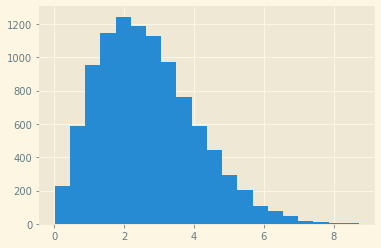

In [8]:
# Weibull Distribution
# USING NUMPY

lam = 1/3
beta = 2
n = 10000

u = np.random.uniform(0, 1, n)
x = (1/lam)*(-np.log(1-u))**(1/beta)

# Plot results
n_bins = 20
plt.hist(x, bins = n_bins)

(array([ 62., 145., 243., 348., 477., 572., 667., 767., 839., 936., 912.,
        845., 712., 672., 533., 445., 373., 239., 149.,  64.]),
 array([0.00578554, 0.10512309, 0.20446063, 0.30379817, 0.40313572,
        0.50247326, 0.6018108 , 0.70114834, 0.80048589, 0.89982343,
        0.99916097, 1.09849852, 1.19783606, 1.2971736 , 1.39651115,
        1.49584869, 1.59518623, 1.69452378, 1.79386132, 1.89319886,
        1.9925364 ]),
 <a list of 20 Patch objects>)

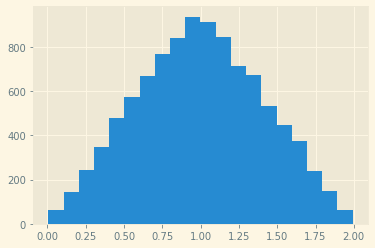

In [9]:
# Triangular Distribution
# USING NUMPY
# An example of generating Tria(0,1,2)
# We have to first solve for X, using the inverse cdf of Tria(0,1,2)

def func(z):
    ''' Triangular distribution Tria(0, 1, 2)
    '''
    if z < 0.5:
        return np.sqrt((2*z))
    else:
        return 2 - np.sqrt(2*(1-z))

n = 10000
u = np.random.uniform(0, 1, n)
x = np.vectorize(func)(u)

# Plot results
n_bins = 20
plt.hist(x, bins=n_bins)

Piecewise((0, x <= 0), (x**2/2, x < 1), (-x**2/2 + 2*x - 1, x <= 2), (1, True))


(array([  7.,  17.,  30.,  32.,  43.,  58.,  62.,  65.,  73.,  97.,  84.,
        103.,  71.,  59.,  51.,  62.,  29.,  32.,  17.,   8.]),
 array([0.03528372, 0.13178663, 0.22828954, 0.32479245, 0.42129536,
        0.51779827, 0.61430118, 0.71080409, 0.807307  , 0.90380992,
        1.00031283, 1.09681574, 1.19331865, 1.28982156, 1.38632447,
        1.48282738, 1.57933029, 1.6758332 , 1.77233611, 1.86883902,
        1.96534193]),
 <a list of 20 Patch objects>)

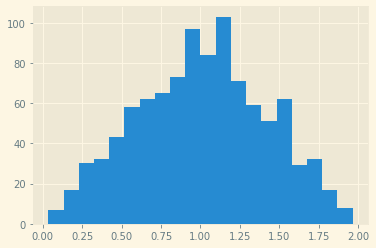

In [10]:
# Triangular Distribution
# USING SYMPY
# We can use sympy instead to generate from any Tria(a, b, c) "directly"
# Using the cdf directly as we have done in the uniform distribution case
# did not seem to work, so we will use the pdf instead, and compute the
# cdf first, which produces it in peicewise form, that we can then use to
# get an expression for X. A little long-winded, but it's a way to automate
# the R.V generation for any Tria(a,b,c)

# Triangular Distribution

from sympy.stats import Triangular
from sympy import nan

# Define any a, b and c, for Tria(a, b, c) distribution
a, b, c = 0, 2, 1

x = Symbol("x")
u = Symbol("u")

# Define triangular distribution Tria(a, b, c), and its pdf, and cdf
D = Triangular("d", a, b, c)

pdf = density(D)(x)
F_x = integrate(pdf, (x))
print(F_x)

# Solve for X
eqn = Eq(F_x, u)
expr = solve(eqn, x)

# generate X's using uniforms
n = 1000
unifs = np.random.uniform(0, 1, n)
xvals = []
for uval in unifs:
    for i in range(len(expr)):
        ans = expr[i].subs({u: uval}).evalf()
        xvals.append(ans)

xvals = [xval for xval in xvals if xval != nan]
xvals = np.array(xvals).astype(np.float64)

# # Plot results
n_bins = 20
plt.hist(xvals, bins=n_bins)

# **Discrete Distributions**

(array([2429.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 7571.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

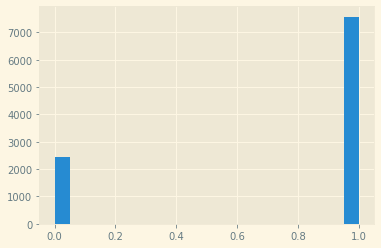

In [11]:
# Bernoulli Distribution
# USING NUMPY

def func(z, p):
    if z <= 1-p:
        return 0
    else:
        return 1

# Define probability p, for Bern(p) distribution
p = 0.75
n = 10000
u = np.random.uniform(0, 1, n)
x = np.vectorize(func)(u, p=p)

# # Plot results
n_bins = 20
plt.hist(x, bins = n_bins)

(array([29., 16.,  0., 17.,  0., 10.,  0.,  6.,  0.,  6., 10.,  0.,  3.,
         0.,  1.,  0.,  0.,  0.,  0.,  2.]),
 array([ 1.  ,  1.55,  2.1 ,  2.65,  3.2 ,  3.75,  4.3 ,  4.85,  5.4 ,
         5.95,  6.5 ,  7.05,  7.6 ,  8.15,  8.7 ,  9.25,  9.8 , 10.35,
        10.9 , 11.45, 12.  ]),
 <a list of 20 Patch objects>)

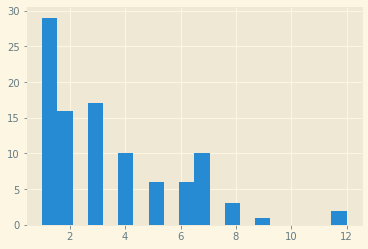

In [40]:
# Geometric Distribution
# USING NUMPY

# Method 1:
# X = min[k: 1-q**k >= U] = ceil(1-U) / ceil(1-p) = ln(U) / ceil(1-p)

def func(u, q):
    k = 1
    while True:
        if 1 - q**k >= u:
            return k
        k += 1
    
# Define probability p, for Geom(p) distribution
p = 0.3
q = 1-p
n = 100
u = np.random.uniform(0, 1, n)
x = np.vectorize(func)(u, q)

# # Plot results
n_bins = 20
plt.hist(x, bins=n_bins)

(array([21., 33.,  0., 14.,  9.,  0.,  7.,  5.,  0.,  4.,  3.,  0.,  1.,
         0.,  0.,  1.,  1.,  0.,  0.,  1.]),
 array([ 1.  ,  1.65,  2.3 ,  2.95,  3.6 ,  4.25,  4.9 ,  5.55,  6.2 ,
         6.85,  7.5 ,  8.15,  8.8 ,  9.45, 10.1 , 10.75, 11.4 , 12.05,
        12.7 , 13.35, 14.  ]),
 <a list of 20 Patch objects>)

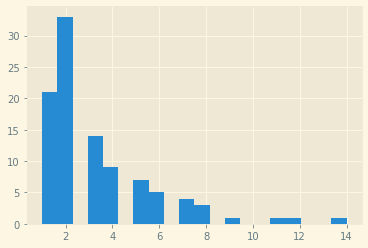

In [13]:
# Geometric Distribution
# USING NUMPY

# Method 2:
# Count number of trials i until U_i <= p

def func(r, p):
    num_trials = 1
    while True:
        unif = np.random.uniform()
        if unif <= p:
            return num_trials
        num_trials += 1
    
# Define probability p, for Geom(p) distribution
p = 0.3
n = 100
r = range(n)
x = np.vectorize(func)(r, p)

# # Plot results
n_bins = 20
plt.hist(x, bins=n_bins)

lam**x*exp(-lam)/factorial(x)


(array([112.,   0., 289.,   0., 276.,   0., 189.,   0.,  93.,   0.,   0.,
         26.,   0.,  10.,   0.,   2.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.45, 0.9 , 1.35, 1.8 , 2.25, 2.7 , 3.15, 3.6 , 4.05, 4.5 ,
        4.95, 5.4 , 5.85, 6.3 , 6.75, 7.2 , 7.65, 8.1 , 8.55, 9.  ]),
 <a list of 20 Patch objects>)

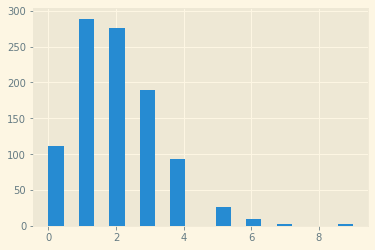

In [50]:
# Poisson Distribution
# USING SYMPY

from sympy.stats import Poisson

x = Symbol("x", positive=True)
lam = Symbol("lam", positive=True)

# Define poisson distribution
D = Poisson("d", lam)

#### and its pmf function
f_x = density(D)(x)
print(f_x)

# Define any lambda for Poisson(lambda) distribution
l = 2

# Generate cdf ranges from pmf function. i.e P(X<=x)
xval = 0
cdf_range = [0]
while True:
    fxval = f_x.evalf(subs={x: xval, lam: l})
    r = cdf_range[-1] + fxval

    if r >= 1:
        break

    cdf_range.append(r)
    xval = xval + 1

def func(u, cdfvals):
    for k, c in enumerate(cdfvals):
        if u <= c:
            return k

# Generate poisson X's from Unif(0, 1) samples
n = 1000
unifs = np.random.uniform(0, 1, n)
x = [func(u, cdf_range[1:]) for u in unifs]

# # Plot results
n_bins = 20
plt.hist(x, bins=n_bins)